Newton-ov metod za minimizaciju 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
data = pd.read_csv("..\Data\BankNote_Authentication.csv")
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [5]:
data['class'] # data['class'].unique

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: class, Length: 1372, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(data, test_size=0.2)
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

print(len(df_train))
print(len(df_test))

1097
275


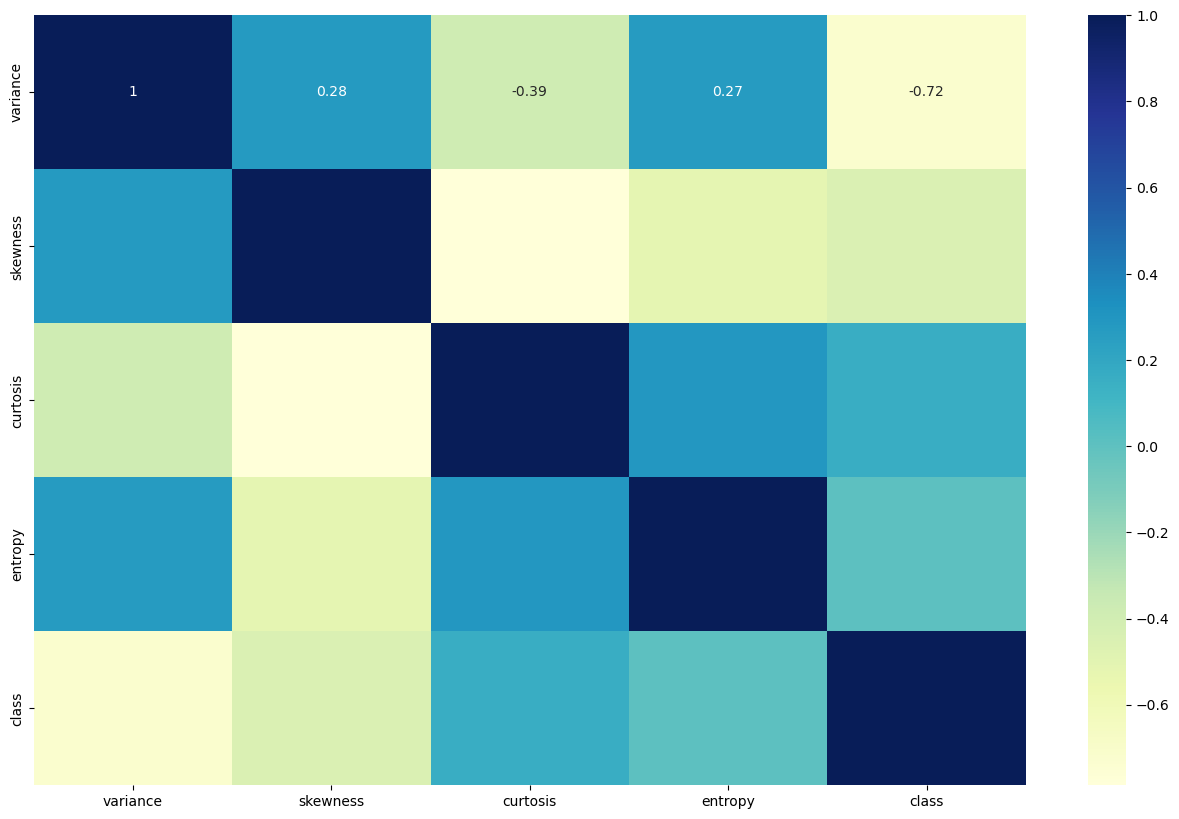

In [7]:
plt.figure(figsize=(16, 10))
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [8]:
y_train = np.array(df_train.pop('class'))
y_test = np.array(df_test.pop('class'))

In [9]:
y_train

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [10]:
# zelimo pretvoriti x_train u matricu, to radimo na sljedeci nacin
x_train = df_train.iloc[:, :].values

In [11]:
x_train

array([[ 0.63655 ,  5.2022  , -5.2159  , -6.1211  ],
       [ 2.6881  ,  6.0195  , -0.46641 , -0.69268 ],
       [-1.0401  ,  9.3987  ,  0.85998 , -5.3336  ],
       ...,
       [ 1.5673  ,  7.9274  , -0.056842, -2.1694  ],
       [-3.1273  , -7.1121  , 11.3897  , -0.083634],
       [-0.036127,  1.525   , -1.4089  , -0.76121 ]])

In [12]:
x_test = df_test.iloc[:, :].values
x_test

array([[ 1.7425 ,  3.6833 , -4.0129 , -1.7207 ],
       [ 0.66018, 10.3878 , -1.4029 , -3.9151 ],
       [ 1.4507 ,  8.7903 , -2.2324 , -0.65259],
       ...,
       [ 4.068  , -2.9363 ,  2.1992 ,  0.50084],
       [-1.8387 , -6.301  ,  5.6506 ,  0.19567],
       [-0.89569,  3.0025 , -3.6067 , -3.4457 ]])

In [13]:
from sklearn.metrics import accuracy_score

class LogistickaRegresija():
    def __init__(self, learning_rate=0.001):
        self.learning_rate = learning_rate
        self.losses = []
        self.train_accuracy = []

    def train(self, x, y, epochs=100):
        self.m, self.n = x.shape[0], x.shape[1]
        self.W = np.zeros(self.n)
        self.b = 0

        for i in range(epochs):
            probabilities = self.predict(x)

            loss = self.calculate_loss(probabilities, y)
            self.losses.append(loss)

            dW, db = self.calcualte_gradients(x, probabilities, y)
            self.gradient_step(dW, db)

            y_pred = self.predict(x, to_classes=True)
            accuracy = accuracy_score(y, y_pred)
            self.train_accuracy.append(accuracy)

            print(f"Train Loss: {loss} | Train Accuracy: {accuracy}")

    def predict(self, x, to_classes=False):
        x_dot = x.dot(self.W) + self.b # dot je mnozenje matrica
        probabilities = self.sigmoid(x_dot)
        if to_classes:
            return np.round(probabilities)
        return probabilities

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def calculate_loss(self, h, y_true):
        return -np.mean(y_true * np.log(h) + (1 - y_true) * np.log(1 - h)) #likelihood

    def calcualte_gradients(self, x, h, y_true):
        dW = -x.T.dot(y_true - h) / self.m
        db = -np.sum(y_true - h) / self.m
        
        return dW, db

    def gradient_step(self, dW, db):
        self.W -= self.learning_rate * dW
        self.b -= self.learning_rate * db
        

In [14]:
model = LogistickaRegresija(learning_rate=5e-2) #1e-2

model.train(x_train, y_train, epochs=10)#20

Train Loss: 0.6931471805599453 | Train Accuracy: 0.6982680036463081
Train Loss: 0.5698166942802158 | Train Accuracy: 0.7411121239744758
Train Loss: 0.5172002382478571 | Train Accuracy: 0.7711941659070192
Train Loss: 0.48033737816892197 | Train Accuracy: 0.7939835916134913
Train Loss: 0.4506334648618429 | Train Accuracy: 0.8313582497721057
Train Loss: 0.4255949471617746 | Train Accuracy: 0.854147675478578
Train Loss: 0.40407582318043217 | Train Accuracy: 0.8723792160437557
Train Loss: 0.3853682074941414 | Train Accuracy: 0.8842297174111212
Train Loss: 0.36896291770743606 | Train Accuracy: 0.894257064721969
Train Loss: 0.3544681499013346 | Train Accuracy: 0.8997265268915223


In [15]:
# accuracy < 50 => model ne valja , jer random guess je 50%, tj model je ipak nesto naucio
# posto se loss smanjuje znaci da smo dobro implementirali gradijnte

In [16]:
y_test_pred = model.predict(x_test, to_classes=True)
accuracy = accuracy_score(y_test, y_test_pred)
accuracy

0.9054545454545454

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

penalty - nacin da smanjimo overfiting

In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [18]:
model.fit(x_train, y_train)

LogisticRegression()

In [19]:
y_train_pred = model.predict(x_train)
accuracy = accuracy_score(y_train, y_train_pred)
accuracy

0.9890610756608933

In [20]:
y_test_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_test_pred)
accuracy

0.9927272727272727

MULTINOMIJALNA LOGISTICKA REGRESIJA - vise klasa

softmax - uzima najveci argument - on je blizu 1